<a href="https://colab.research.google.com/github/gopiBNK/files/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 100.0%
Confusion Matrix: {'Category-B': {'Category-B': 0, 'Category-C': 0, 'Category-A': 0}, 'Category-C': {'Category-B': 0, 'Category-C': 1, 'Category-A': 0}, 'Category-A': {'Category-B': 0, 'Category-C': 0, 'Category-A': 1}}


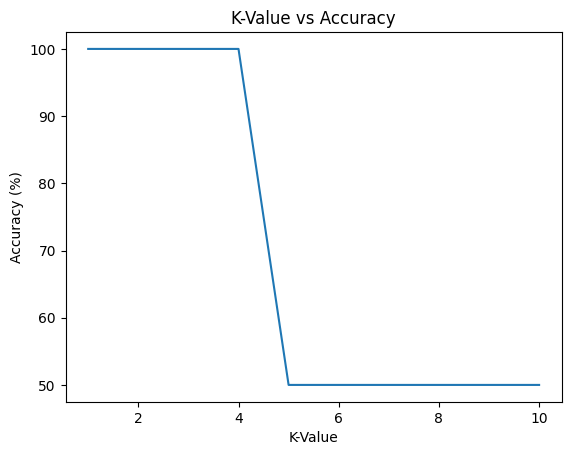

Optimal K-Value: 1, Best Accuracy: 100.0%


In [3]:
import math
import random
import matplotlib.pyplot as plt
from collections import Counter

def calculate_euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))
def split_dataset(data, split_ratio=0.8):
    random.shuffle(data)
    split_point = int(len(data) * split_ratio)
    return data[:split_point], data[split_point:]
def knn_classifier(training_data, test_instance, k_value):

    distances = [(calculate_euclidean_distance(test_instance[:-1], train_instance[:-1]), train_instance[-1])
                 for train_instance in training_data]
    k_nearest_neighbors = sorted(distances, key=lambda x: x[0])[:k_value]
    neighbor_labels = [neighbor[1] for neighbor in k_nearest_neighbors]
    return Counter(neighbor_labels).most_common(1)[0][0]
def compute_accuracy(actual_labels, predicted_labels):
    correct_predictions = sum(1 for actual, predicted in zip(actual_labels, predicted_labels) if actual == predicted)
    return (correct_predictions / len(actual_labels)) * 100
def generate_confusion_matrix(actual_labels, predicted_labels, class_labels):
    matrix = {label: {label: 0 for label in class_labels} for label in class_labels}
    for actual, predicted in zip(actual_labels, predicted_labels):
        if actual and predicted:
            matrix[actual][predicted] += 1
    return matrix
def analyze_k_values(train_data, test_data, max_k_value):
    k_values = range(1, max_k_value + 1)
    accuracy_list = []

    for k in k_values:
        predictions = [knn_classifier(train_data, test_instance, k) for test_instance in test_data]
        actual_labels = [test_instance[-1] for test_instance in test_data]
        accuracy = compute_accuracy(actual_labels, predictions)
        accuracy_list.append(accuracy)
    plt.plot(k_values, accuracy_list)
    plt.xlabel('K-Value')
    plt.ylabel('Accuracy (%)')
    plt.title('K-Value vs Accuracy')
    plt.show()


    optimal_k = k_values[accuracy_list.index(max(accuracy_list))]
    return optimal_k, max(accuracy_list)

custom_dataset = [
    [5.2, 3.4, 1.5, 0.3, 'Category-A'],
    [4.8, 3.1, 1.6, 0.2, 'Category-A'],
    [6.3, 2.9, 5.6, 2.4, 'Category-C'],
    [5.7, 3.0, 5.2, 1.7, 'Category-C'],
    [5.4, 2.5, 4.1, 1.4, 'Category-B'],
    [6.1, 2.8, 4.2, 1.2, 'Category-B'],
    [4.9, 3.0, 1.4, 0.1, 'Category-A'],
    [6.5, 3.0, 5.8, 2.2, 'Category-C'],
    [5.6, 2.7, 4.2, 1.3, 'Category-B'],
    [6.0, 2.9, 5.0, 1.5, 'Category-C']
]


train_set, test_set = split_dataset(custom_dataset)


predicted = [knn_classifier(train_set, test_instance, 3) for test_instance in test_set]
actual = [test_instance[-1] for test_instance in test_set]

accuracy = compute_accuracy(actual, predicted)
print(f"Model Accuracy: {accuracy}%")


categories = set([item[-1] for item in custom_dataset])
conf_matrix = generate_confusion_matrix(actual, predicted, categories)
print("Confusion Matrix:", conf_matrix)

best_k, best_acc = analyze_k_values(train_set, test_set, max_k_value=10)
print(f"Optimal K-Value: {best_k}, Best Accuracy: {best_acc}%")
